# Analiza badania (en)

In [9]:
%load_ext autoreload
%autoreload 2

In [24]:
# Data preprocessing

LANGUAGE = 'en'
VERBOSE = False # use for analysis of raw data during preprocessing

from preprocess_data import preprocess_pipeline
from analyze_data import get_mean_answers_for_all_stories

dfs, truetemp_data = preprocess_pipeline(LANGUAGE, VERBOSE)

Index(['gender', 'year', 'education', 'philosophy_education', 'native_speaker',
       'ControlCoinflip', 'CoinflipKnow', 'ControlTruetemp', 'TruetempKnow',
       'interviewtime', 'groupTime8122', 'groupTime8125', 'groupTime8123',
       'groupTime8124', 'groupTime8126'],
      dtype='object')
Index(['gender', 'year', 'education', 'philosophy_education', 'native_speaker',
       'ControlTruetemp', 'TruetempKnow', 'ControlCoinflip', 'CoinflipKnow',
       'interviewtime', 'groupTime8106', 'groupTime8109', 'groupTime8110',
       'groupTime8108', 'groupTime8107'],
      dtype='object')
Index(['gender', 'year', 'education', 'philosophy_education', 'native_speaker',
       'ControlTruetemp', 'TruetempKnow', 'ControlChemist', 'ChemistKnow',
       'interviewtime', 'groupTime8116', 'groupTime8119', 'groupTime8120',
       'groupTime8118', 'groupTime8121'],
      dtype='object')
Index(['gender', 'year', 'education', 'philosophy_education', 'native_speaker',
       'ControlChemist', 'ChemistK

In [2]:
# Show gender proportions
from tabulate import tabulate

males = []
females = []
total = []
for df in dfs.values():
    males.append(len(df[df.gender=='Male']))
    females.append(len(df[df.gender=='Female']))
    total.append(males[-1] + females[-1])

print('{} mężczyzn, {} kobiet, {} łącznie\n'.format(sum(males), sum(females), sum(total)))

print(tabulate(zip(dfs.keys(), total, males, females), headers=['', 'total', 'males', 'females']))

70 mężczyzn, 122 kobiet, 192 łącznie

                     total    males    females
-----------------  -------  -------  ---------
Coinflip-Truetemp       49       12         37
Truetemp-Coinflip       48       22         26
Truetemp-Chemist        46       16         30
Chemist-Truetemp        49       20         29


In [3]:
# Means of all answers with standard deviation

from translation import get_score_dict

print('Possible scores: ', get_score_dict(LANGUAGE), '\n')

get_mean_answers_for_all_stories(dfs)

Possible scores:  {'Strongly disagree': -2, 'Disagree': -1, 'Neutral': 0, 'Agree': 1, 'Strongly agree': 2} 

group                     q1      std1         q2      std2
-----------------  ---------  --------  ---------  --------
Coinflip-Truetemp  -0.938776  1.05769    0.285714  1.17803
Truetemp-Coinflip   0.5       1.25831   -0.729167  1.27049
Truetemp-Chemist    0.26087   1.18752    1.21739   0.953553
Chemist-Truetemp    1.46939   0.882992   0.244898  1.40742


In [4]:
from scipy.stats import f_oneway, ttest_ind
from tabulate import tabulate

c = 'Coinflip'
t = 'Truetemp'
ch = 'Chemist'

def show_truetemp_answers_stats(data):
    rob = data.values()
    print('Wszystkie oceny truetempa: {}\n'.format(sum(len(list(group_data)) for group_data in data.values())))
    headers = ['group', 'answers']
    print(tabulate([[group, len(list(answers))] for group, answers in data.items()], headers=headers), '\n')

print('Podsumowanie po grupach')
show_truetemp_answers_stats(truetemp_data)
print('Test dzielony po wszystkich grupach')
print('{}, {}, {}, {}'.format(*list(truetemp_data.keys())))
test_data = tuple(truetemp_data.values())
print(f_oneway(*test_data), '\n')

# print('Podsumowanie po kolejności truetempa')
# show_truetemp_answers_stats(truetemp_pos_data)
print('Test dzielony po kolejności truetempa i poprzedzającej historyjce')
print('c-t, t-*, ch-t')
test_data = list(truetemp_data['{}-{}'.format(c, t)]), list(truetemp_data['{}-{}'.format(t, ch)]) + list(truetemp_data['{}-{}'.format(t, c)]),list(truetemp_data['{}-{}'.format(ch, t)])
print(f_oneway(*test_data), '\n')

print('Test dzielony tylko po kolejności truetempa')
print('*-t, t-*')
test_data = list(truetemp_data['{}-{}'.format(c, t)]) + list(truetemp_data['{}-{}'.format(ch, t)]), list(truetemp_data['{}-{}'.format(t, c)]) + list(truetemp_data['{}-{}'.format(t, ch)])
print(f_oneway(*test_data))
print(ttest_ind(*test_data), '\n')

print('Test wpływu na truetempa')
print('c-t, ch-t')
test_data = truetemp_data['{}-{}'.format(c, t)], truetemp_data['{}-{}'.format(ch, t)]
print(f_oneway(*test_data))
print(ttest_ind(*test_data))

Podsumowanie po grupach
Wszystkie oceny truetempa: 192

group                answers
-----------------  ---------
Coinflip-Truetemp         49
Truetemp-Coinflip         48
Truetemp-Chemist          46
Chemist-Truetemp          49 

Test dzielony po wszystkich grupach
Coinflip-Truetemp, Truetemp-Coinflip, Truetemp-Chemist, Chemist-Truetemp
F_onewayResult(statistic=0.41958822206237983, pvalue=0.7391543540655554) 

Test dzielony po kolejności truetempa i poprzedzającej historyjce
c-t, t-*, ch-t
F_onewayResult(statistic=0.21687209073103741, pvalue=0.8052329888491696) 

Test dzielony tylko po kolejności truetempa
*-t, t-*
F_onewayResult(statistic=0.4107461692942566, pvalue=0.5223632782076342)
Ttest_indResult(statistic=-0.6408948192131507, pvalue=0.5223632782076424) 

Test wpływu na truetempa
c-t, ch-t
F_onewayResult(statistic=0.02373887240356083, pvalue=0.8778746344882873)
Ttest_indResult(statistic=0.15407424315426904, pvalue=0.8778746344882733)


In [5]:
# Manual ANOVA over all four groups

# Assumptions:
# 1. Normal distribution of all populations
# 2. Equal variances
# (Also independent and indentically distributed trials)
print('groups:', list(truetemp_data.keys()))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ASSUMPTION 1
sns.distplot(truetemp_data['Coinflip-Truetemp'])
sns.distplot(truetemp_data['Truetemp-Coinflip'])
sns.distplot(truetemp_data['Truetemp-Chemist'])
sns.distplot(truetemp_data['Chemist-Truetemp'])
# g = sns.FacetGrid(truetemp_data)
# g.map(plt.hist)

# tips_data = sns.load_dataset('tips')
# type(tips_data)
# pd.DataFrame(truetemp_data)

# ASSUMPTION 2
print('{}={}={}={}'.format(*[np.var(population) for population in truetemp_data.values()]))

# F statistic
n = sum(total)
r = len(truetemp_data)
truetemp_sum = sum(map(sum, truetemp_data.values()))
truetemp_mean = truetemp_sum / n
print('truetemp_mean:', truetemp_mean)
mstr = 1 / (r - 1) * sum(len(population) * (np.mean(population) - truetemp_mean) ** 2 for population in truetemp_data.values())
mse = 1 / (n - r) * sum((x - np.mean(population)) ** 2 for population in truetemp_data.values() for x in population)
f = mstr / mse
print('f: {}, f critical for 120: {}, f critical for inf: {}'.format(f, 2.6802, 2.6049))

groups: ['Coinflip-Truetemp', 'Truetemp-Coinflip', 'Truetemp-Chemist', 'Chemist-Truetemp']
1.3877551020408163=1.5833333333333333=1.4102079395085065=1.9808413161182838
truetemp_mean: 0.3229166666666667
f: 0.419588222062379, f critical for 120: 2.6802, f critical for inf: 2.6049


/Users/derrkater/PycharmProjects/survey_analysis/survey_analysis/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Actually ANOVA test might be inproper for checking if means of truetemp answers are meaningfully different because of it's assumptions. 

Bartlett's test and Lavene's tests can be used to verify if variances of groups are actually equal and thus check the 2nd assumption. The latter is more robust to the lack of normality in populations.

In [6]:
# Levene's test and Bartlett's test

from scipy.stats import levene, bartlett
print(levene(*truetemp_data.values()))
print(bartlett(*truetemp_data.values()))

LeveneResult(statistic=1.358897404852196, pvalue=0.2567727841946056)
BartlettResult(statistic=1.9607486320872332, pvalue=0.5805933095348819)


From above results we can infer that our data is not sampled with a normal distribution, because Bartlett test which is less robust to nonnormality went worse. We test normality of each population with chi2 test and Shapiro-Wilk test.

In [7]:
# Chi2 test

from scipy.stats import chisquare
for name, population in truetemp_data.items():
    print(name, chisquare(population))

Coinflip-Truetemp Power_divergenceResult(statistic=237.99999999999997, pvalue=5.4483165793123174e-27)
Truetemp-Coinflip Power_divergenceResult(statistic=152.0, pvalue=5.393600337655642e-13)
Truetemp-Chemist Power_divergenceResult(statistic=248.66666666666663, pvalue=5.5062504678364476e-30)
Chemist-Truetemp Power_divergenceResult(statistic=396.3333333333333, pvalue=2.5690790757922117e-56)


In [8]:
# Shapiro-Wilk test

from scipy.stats import shapiro
for name, population in truetemp_data.items():
    print(name, shapiro(population))

Coinflip-Truetemp (0.855597198009491, 2.598374521767255e-05)
Truetemp-Coinflip (0.8699878454208374, 7.719966379227117e-05)
Truetemp-Chemist (0.8684391379356384, 9.620378114050254e-05)
Chemist-Truetemp (0.8411385416984558, 1.0695058335841168e-05)


preceding      truetemp mean    truetemp std
-----------  ---------------  --------------
c                   0.285714         1.38776
none                0.382979         1.5129
ch                  0.244898         1.98084


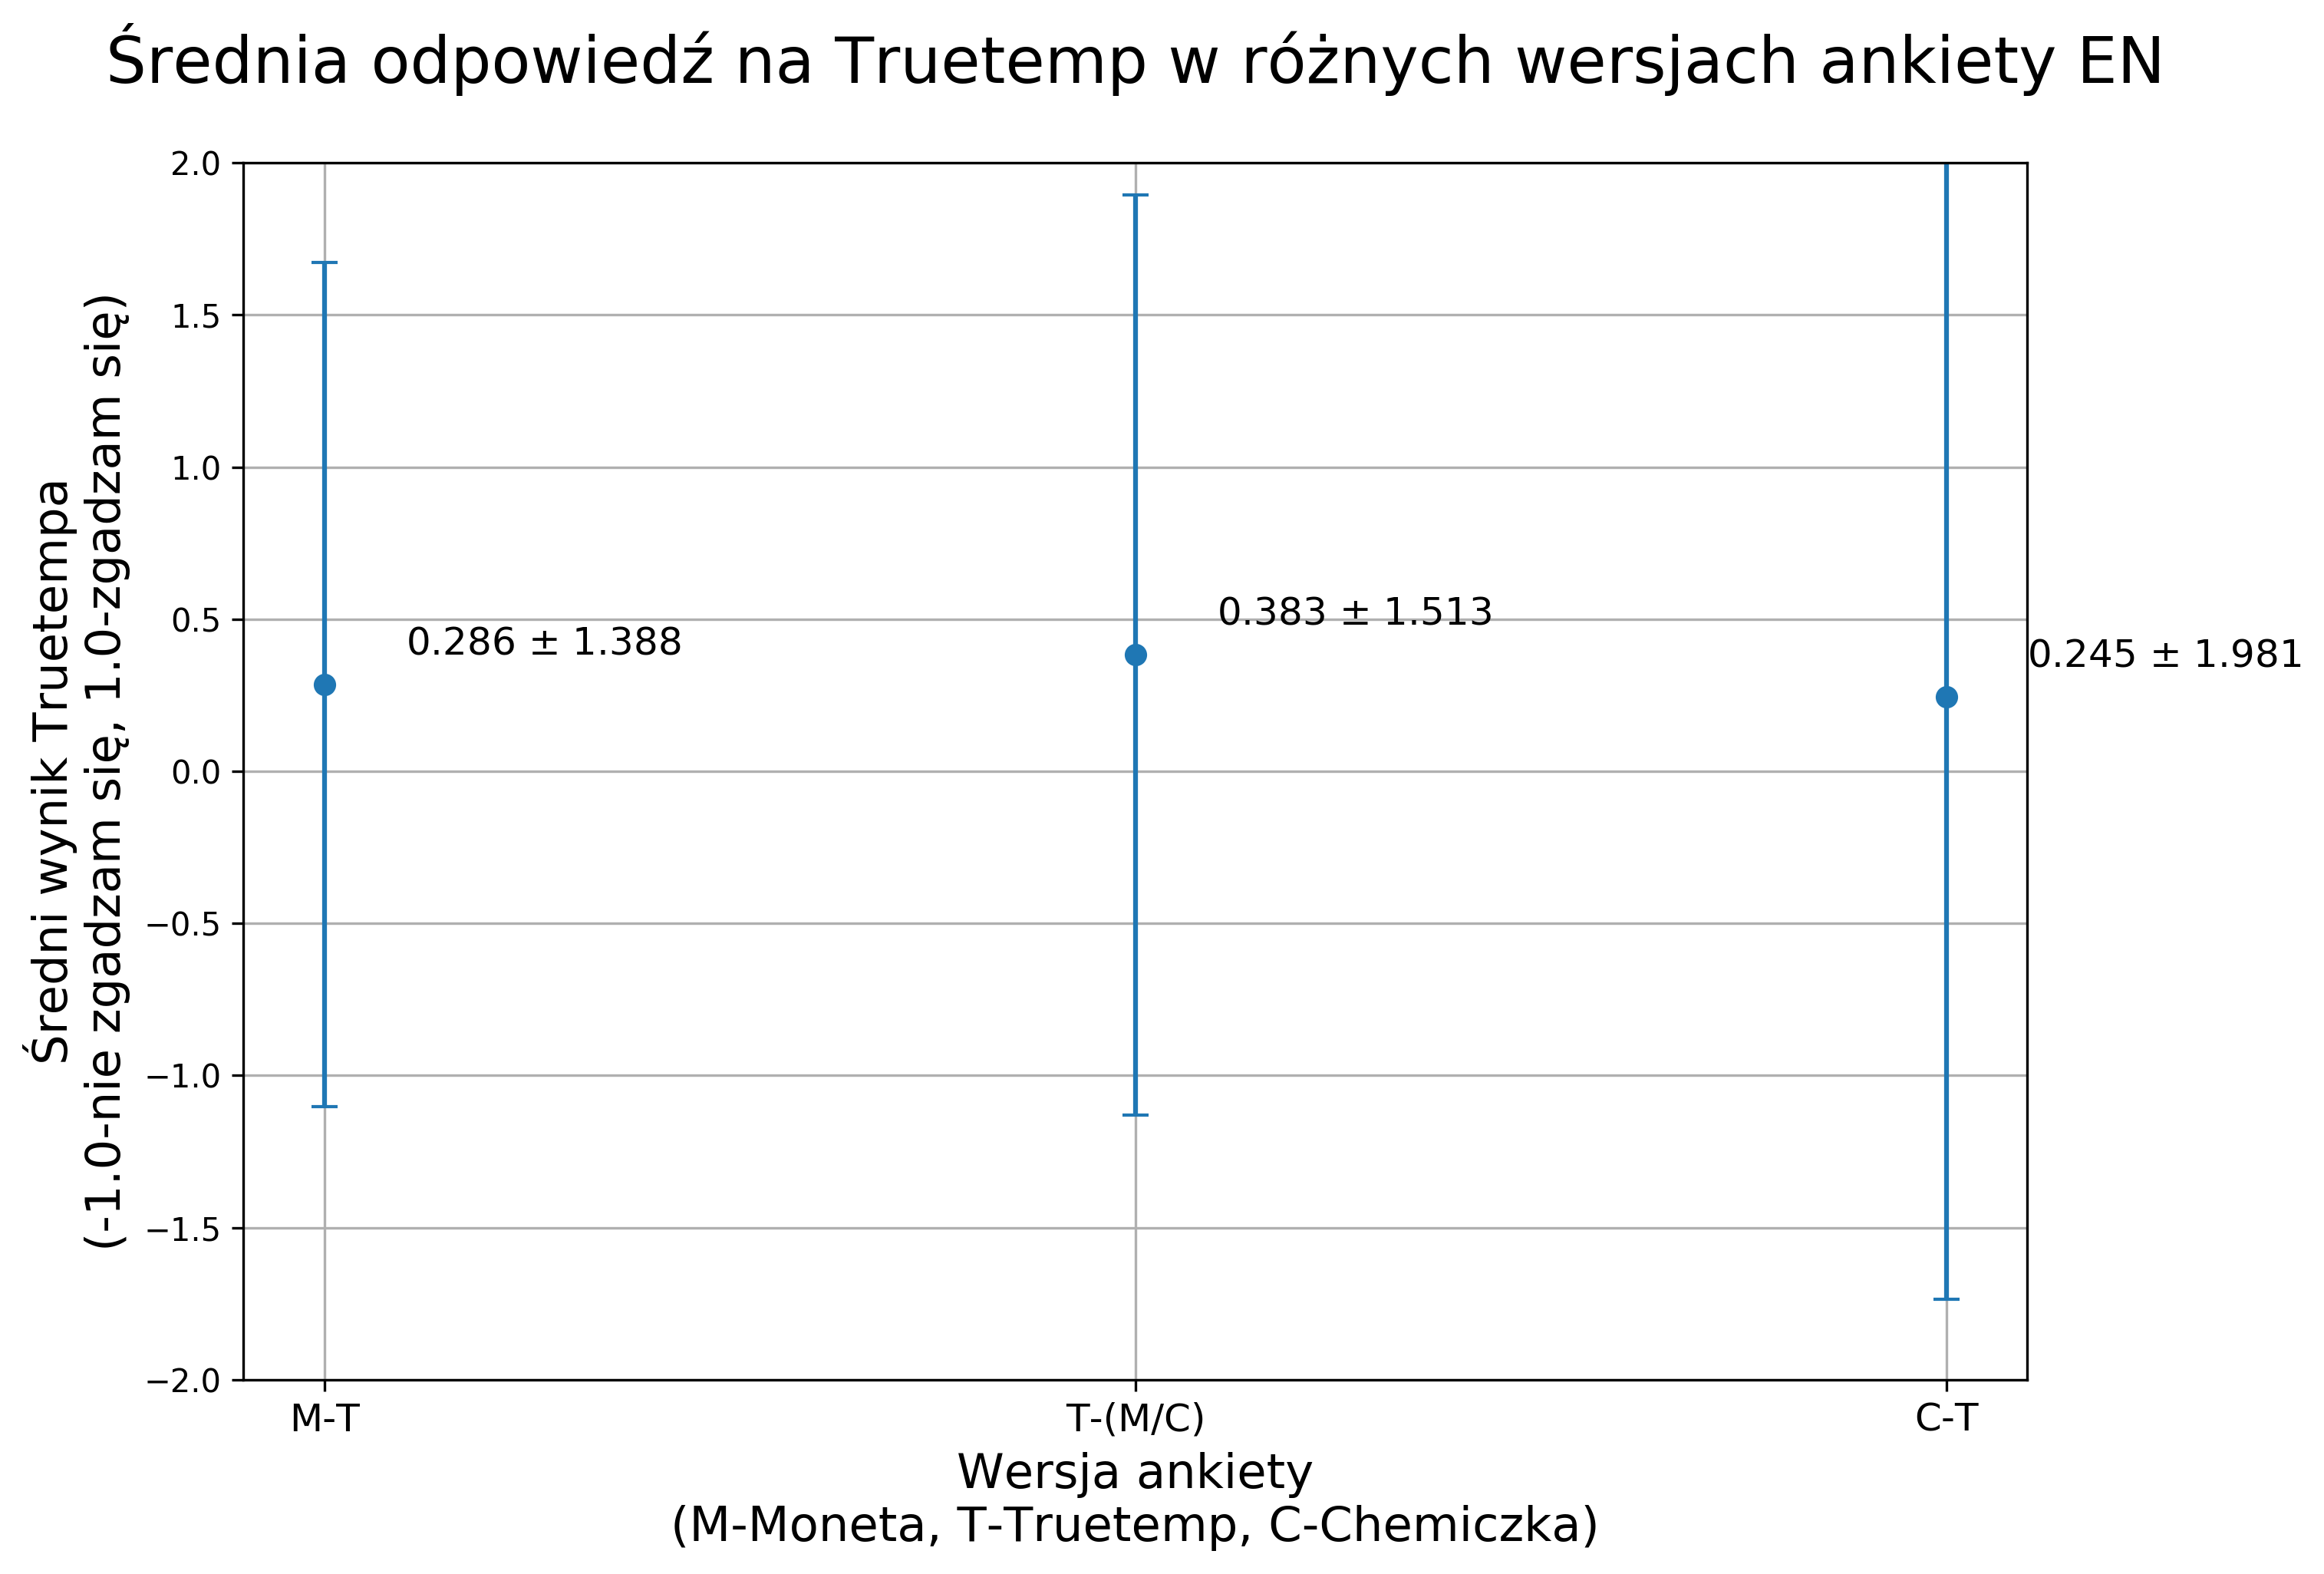

In [20]:
from visualize_data import plot_truetemp_dependence_on_preceding_story

plot_data = {'c': list(truetemp_data['{}-{}'.format(c, t)]),
             'none': list(truetemp_data['{}-{}'.format(t, ch)]) + list(truetemp_data['{}-{}'.format(t, c)]),
             'ch': list(truetemp_data['{}-{}'.format(ch, t)])}

plot_truetemp_dependence_on_preceding_story(plot_data, 'mean_truetemp_en', language='en', format='png')